In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv('world-data-2023.csv')

In [15]:
df.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [53]:
columns_to_convert = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
                      'Birth Rate', 'Co2-Emissions', 'Forested Area (%)',
                      'CPI', 'CPI Change (%)', 'Fertility Rate', 'Gasoline Price', 'GDP',
                      'Gross primary education enrollment (%)', 'Armed Forces size',
                      'Gross tertiary education enrollment (%)', 'Infant mortality',
                      'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 
                      'Out of pocket health expenditure', 'Physicians per thousand', 
                      'Population', 'Population: Labor force participation (%)', 
                      'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population']
df[columns_to_convert] = df[columns_to_convert].applymap(lambda x: float(str(x).replace('%','').replace(',', '').replace('$','')))

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    float64
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    float64
 4   Land Area(Km2)                             194 non-null    float64
 5   Armed Forces size                          171 non-null    float64
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    float64
 10  CPI                       

In [83]:
df.isna().sum()#ivdea null undayirunnu

Country                                      0
Density\n(P/Km2)                             0
Abbreviation                                 0
Agricultural Land( %)                        0
Land Area(Km2)                               0
Armed Forces size                            0
Birth Rate                                   0
Calling Code                                 0
Capital/Major City                           0
Co2-Emissions                                0
CPI                                          0
CPI Change (%)                               0
Currency-Code                                0
Fertility Rate                               0
Forested Area (%)                            0
Gasoline Price                               0
GDP                                          0
Gross primary education enrollment (%)       0
Gross tertiary education enrollment (%)      0
Infant mortality                             0
Largest city                                 0
Life expectan

In [93]:

numeric=df.select_dtypes(include=['float64'])
numeric=numeric.columns[numeric.isnull().any()]
df[numeric]=df[numeric].fillna(df[numeric].mean())


category=df.select_dtypes(include=['object'])
category=category.columns[category.isnull().any()]
df[category]=df[category].fillna(df[category].mode().iloc[0])

IndexError: single positional indexer is out-of-bounds

In [85]:
a=df.isnull().sum()
print(a)

Country                                      0
Density\n(P/Km2)                             0
Abbreviation                                 0
Agricultural Land( %)                        0
Land Area(Km2)                               0
Armed Forces size                            0
Birth Rate                                   0
Calling Code                                 0
Capital/Major City                           0
Co2-Emissions                                0
CPI                                          0
CPI Change (%)                               0
Currency-Code                                0
Fertility Rate                               0
Forested Area (%)                            0
Gasoline Price                               0
GDP                                          0
Gross primary education enrollment (%)       0
Gross tertiary education enrollment (%)      0
Infant mortality                             0
Largest city                                 0
Life expectan

## Data visulalisation

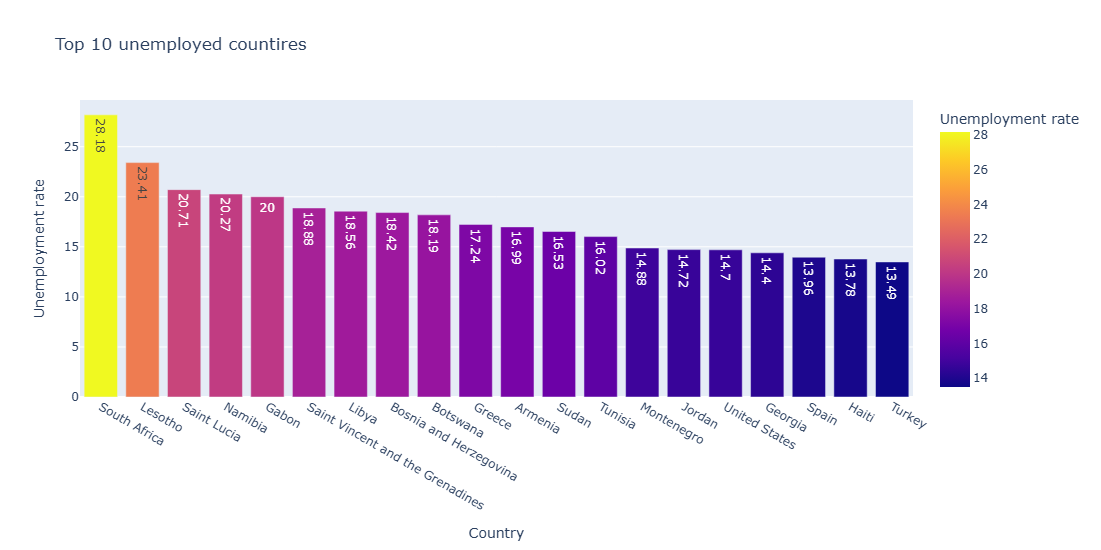

In [156]:
fig=px.bar(df.nlargest(20,'Unemployment rate')[['Country','Unemployment rate']],x='Country',y='Unemployment rate',color='Unemployment rate',title='Top 10 unemployed countires',text='Unemployment rate')
fig.update_layout(width=1000,height=550)
fig.show()

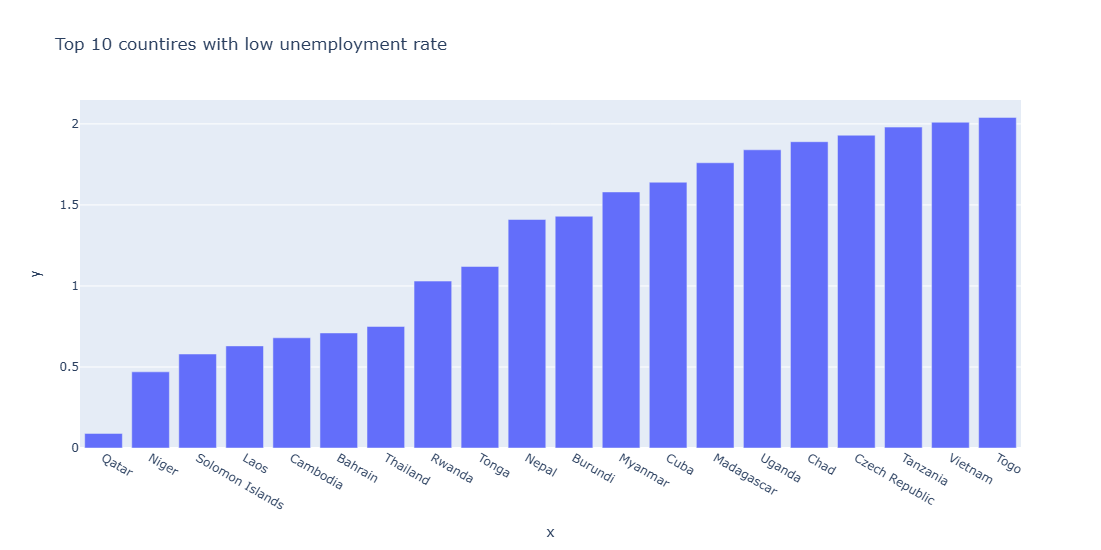

In [123]:
a=df.groupby('Country').agg({'Unemployment rate':'sum'}).sort_values(by='Unemployment rate',ascending=True).head(20).reset_index()
fig=px.bar(x=a.Country,y=a['Unemployment rate'],title='Top 10 countires with low unemployment rate')
fig.update_layout(width=1000,height=550)
fig.show()

Text(0.5, 0, 'population in Billions')

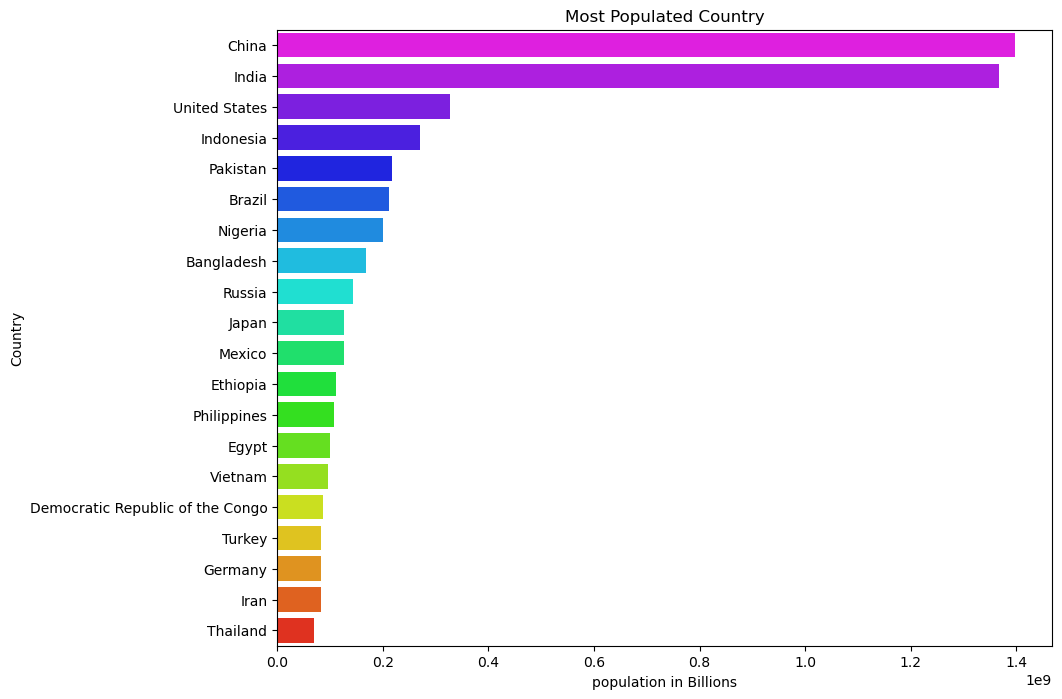

In [148]:
a=df.groupby('Country').agg({"Population":'sum'}).sort_values(by='Population',ascending=False).head(20).reset_index()
plt.figure(figsize=(10,8))
figure=sns.barplot(y=a.Country,x=a.Population,palette='gist_rainbow_r')
plt.title('Most Populated Country')
plt.xlabel('population in Billions')

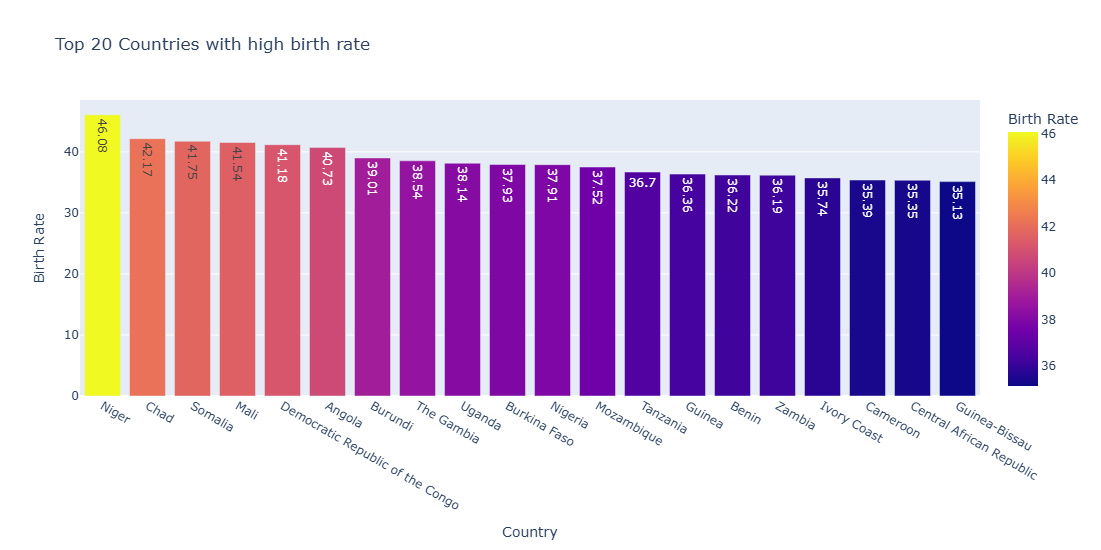

In [160]:
fig=px.bar(df.nlargest(20,'Birth Rate')[['Country','Birth Rate']],x='Country',y='Birth Rate',color='Birth Rate',text='Birth Rate',title='Top 20 Countries with high birth rate ')
fig.update_layout(width=1000,height=550)
fig.show()

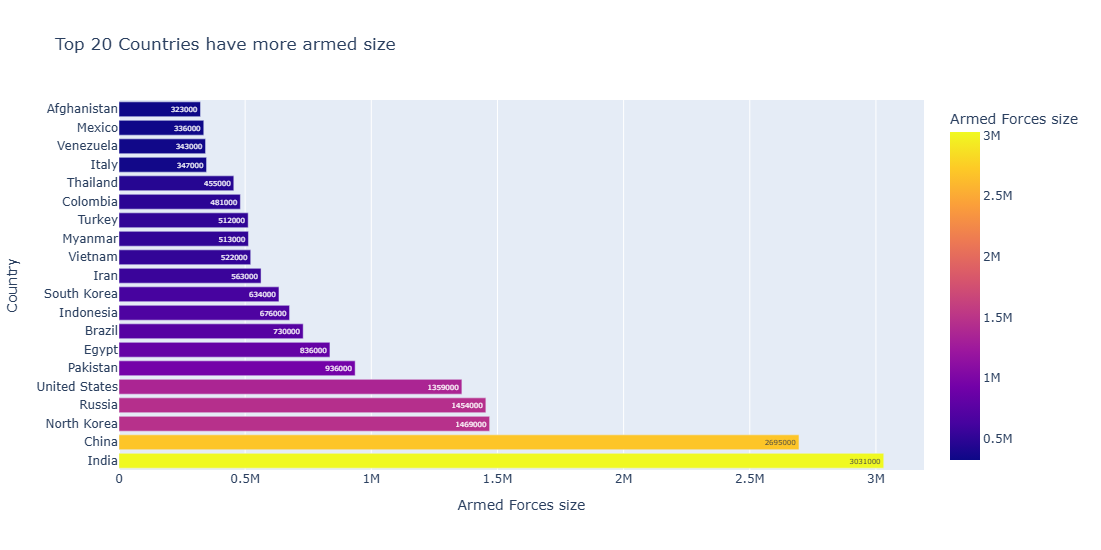

In [170]:
fig=px.bar(df.nlargest(20,'Armed Forces size')[['Country','Armed Forces size']],y='Country',x='Armed Forces size',color='Armed Forces size',text='Armed Forces size',title='Top 20 Countries have more armed size')
fig.update_layout(width=1000,height=550)
fig.show()

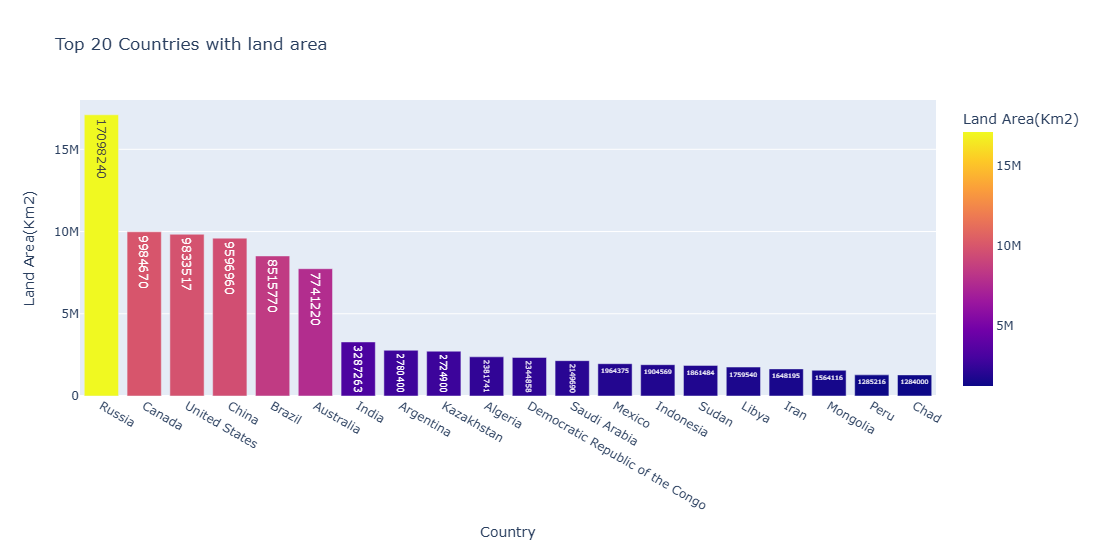

In [174]:
fig=px.bar(df.nlargest(20,'Land Area(Km2)')[['Country','Land Area(Km2)']],x='Country',y='Land Area(Km2)',color='Land Area(Km2)',text='Land Area(Km2)',title='Top 20 Countries with land area')
fig.update_layout(width=1000,height=550)
fig.show()

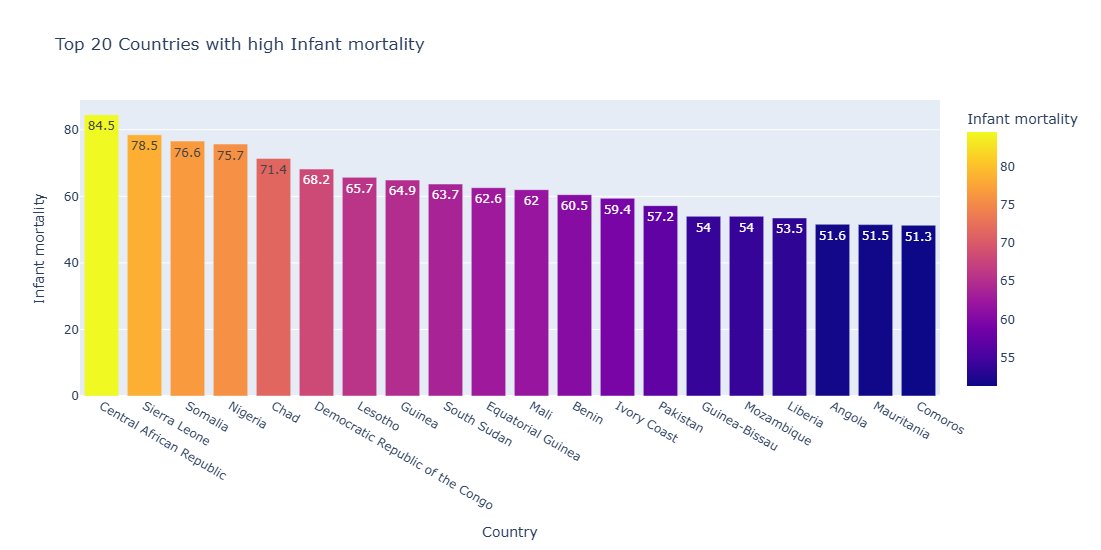

In [176]:
fig=px.bar(df.nlargest(20,'Infant mortality')[['Country','Infant mortality']],x='Country',y='Infant mortality',color='Infant mortality',text='Infant mortality',title='Top 20 Countries with high Infant mortality')
fig.update_layout(width=1000,height=550)
fig.show()

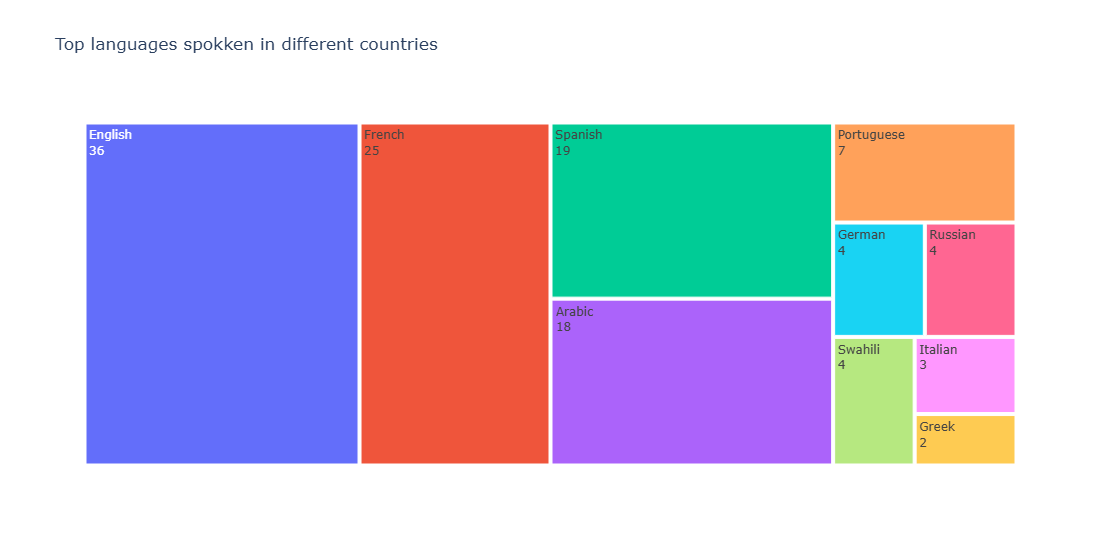

In [210]:
a=df.groupby('Official language').agg({"Country":'count'}).sort_values(by='Country',ascending=False).reset_index().head(10)
fig=px.treemap(a,path=['Official language'],values='Country',title='Top languages spokken in different countries')
fig.update_layout(width=1000,height=550)
fig.update_traces(textinfo='label+value')
fig.show()

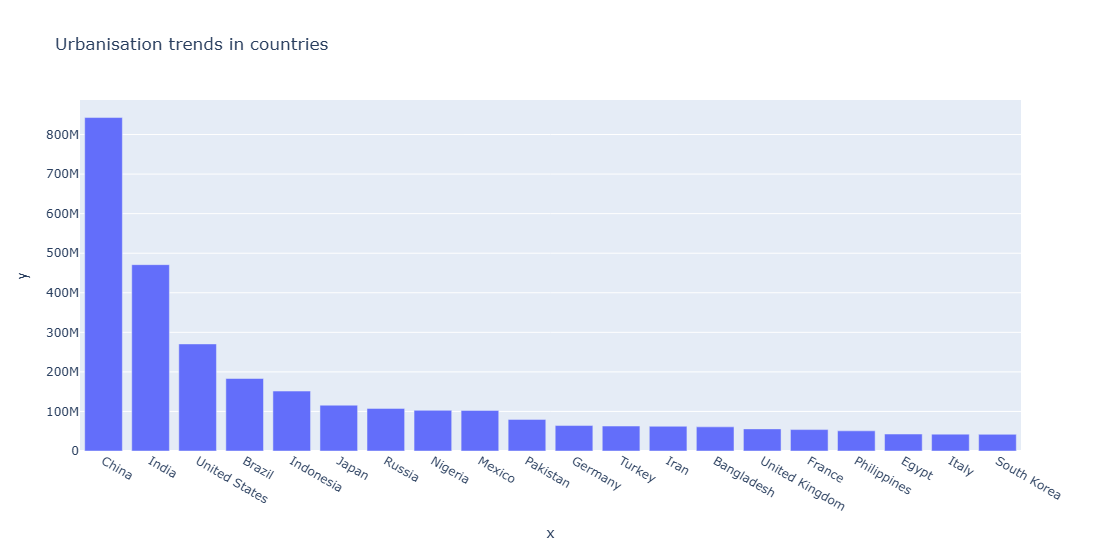

In [232]:
a=df.groupby('Country').agg({"Urban_population":'mean'}).sort_values(by='Urban_population',ascending=False).reset_index().head(20)
fig=px.bar(x=a['Country'],y=a['Urban_population'],title='Urbanisation trends in countries')
fig.update_layout(width=1000,height=550)
fig.show()

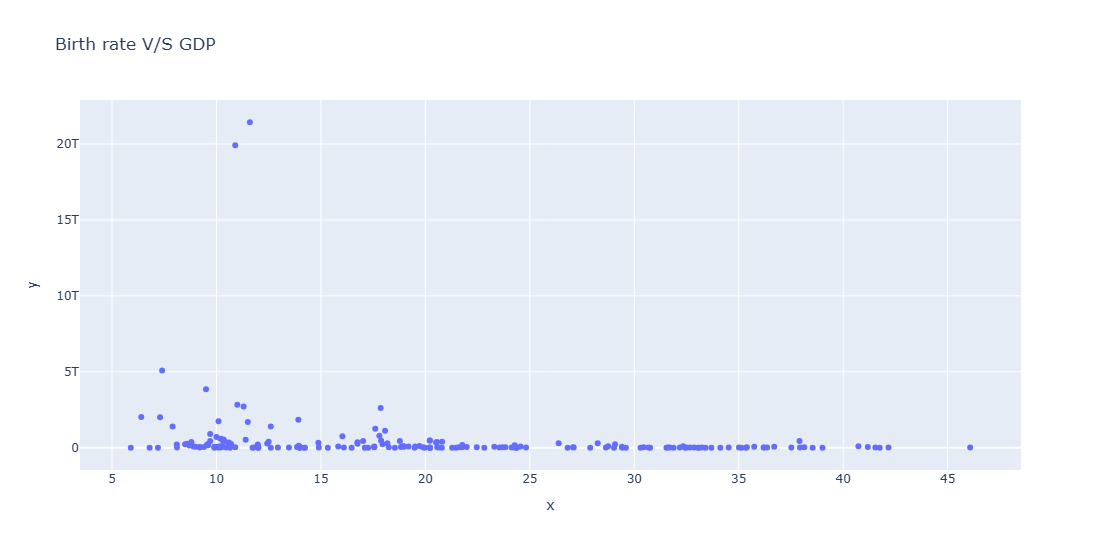

In [256]:
fig=px.scatter(x=df['Birth Rate'],y=df.GDP,title='Birth rate V/S GDP')
fig.update_layout(width=1000,height=550)
fig.show()

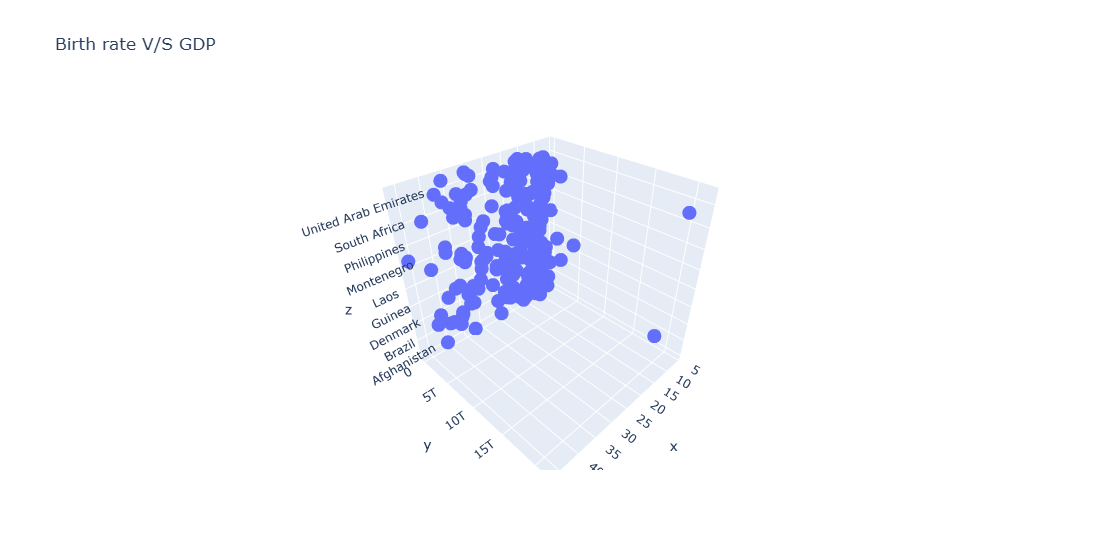

In [264]:
fig=px.scatter_3d(x=df['Birth Rate'],y=df.GDP,z=df['Country'],title='Birth rate V/S GDP in each country')
fig.update_layout(width=1000,height=550)
fig.show()

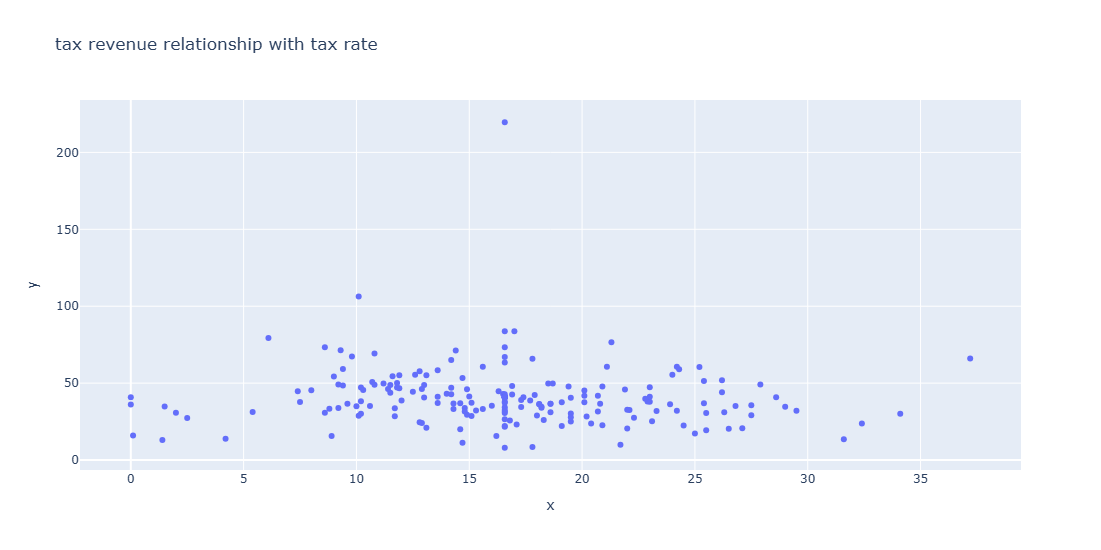

In [272]:
fig=px.scatter(x=df['Tax revenue (%)'],y=df['Total tax rate'],title='tax revenue relationship with tax rate')
fig.update_layout(width=1000,height=550)
fig.show()

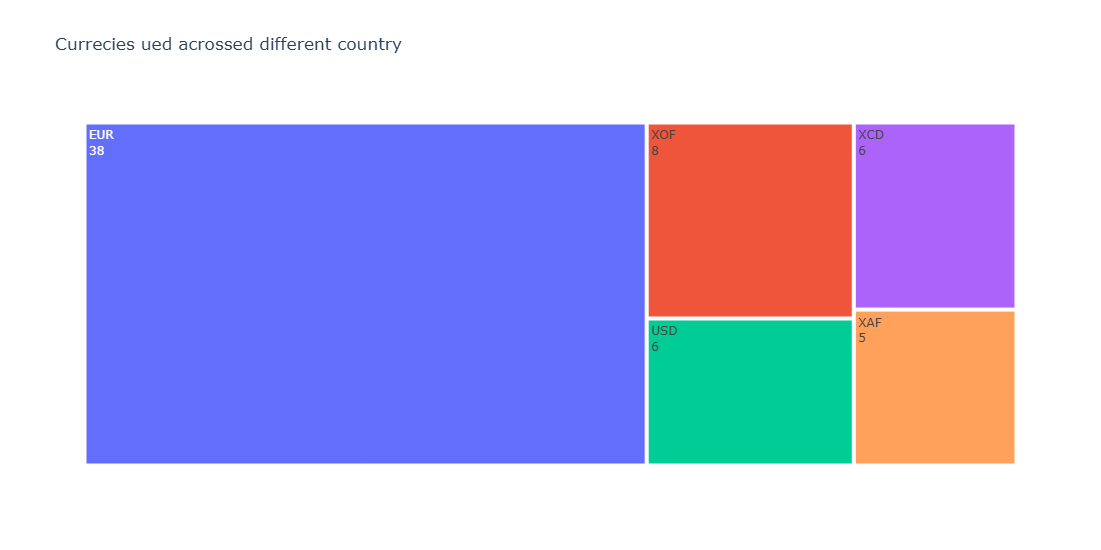

In [278]:
a=df.groupby('Currency-Code').agg({"Country":'count'}).sort_values(by='Country',ascending=False).reset_index().head(5)
fig=px.treemap(a,path=['Currency-Code'],values='Country',title='Currecies ued acrossed different country')
fig.update_layout(width=1000,height=550)
fig.update_traces(textinfo='label+value')
fig.show()